In [1]:
import json
import pandas as pd
import numpy
import torch
import sklearn
mother = pd.read_json('cleanedAppliances.json')

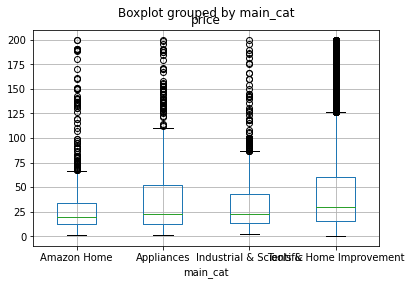

In [22]:
# 1. Boxplot by Main Cat
targetcats = ['Amazon Home', 'Appliances', 'Industrial & Scientific', 'Tools & Home Improvement']
t1df = mother.loc[mother['main_cat'].isin(targetcats)]
t1df = t1df.loc[t1df['price'] <= 200]
boxplot = t1df.boxplot(column = 'price', by='main_cat')

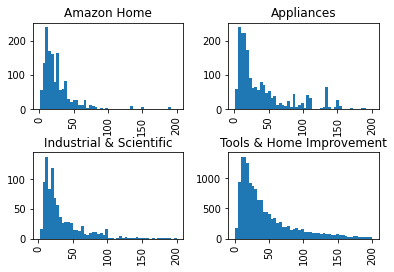

In [31]:
targetcats = ['Amazon Home', 'Appliances', 'Industrial & Scientific', 'Tools & Home Improvement']
t2df = mother.loc[mother['main_cat'].isin(targetcats)]
t2df = t2df.loc[t2df['price'] <= 200]
boxplot = t2df.hist(column = 'price', by='main_cat', bins = 50)

In [32]:
mother

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin
0,"[Appliances, Refrigerators, Freezers & Ice Mak...",[2 X Tupperware Pure & Fresh Unique Covered Co...,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],Appliances,3.62,7861850250
1,"[Appliances, Parts &amp; Accessories]",[],The Cigar - Moments of Pleasure,[],The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",Amazon Home,150.26,8792559360
2,"[Appliances, Parts & Accessories, Range Parts ...",[Full gauge and size beveled-edge; furnished w...,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],Tools & Home Improvement,3.43,B00002N5EL
3,"[Appliances, Parts & Accessories, Range Parts ...",[Outfit your dryer with top-notch connections ...,"Leviton 5050 B01-0-000 Electrical Receptacle, ...","[B000BPFZHM, B000FP8LK6, B07D5RQ5YL, B00002N7I...",Leviton,"[N/A, Made in USA, Built of durable thermoplas...","[>#155,450 in Tools & Home Improvement (See to...",[],Tools & Home Improvement,6.98,B00002N7HY
4,"[Appliances, Parts & Accessories, Range Parts ...",[Amerock BP5322BJ Allison Value Hardware 1-1/2...,Amerock BP5322-BJ 1-1/2-Inch Diameter Ceramic ...,[],Amerock,"[1-1/2"" diameter, Round ceramic knob with flat...","[>#1,118,542 in Tools & Home Improvement (See ...",[],Tools & Home Improvement,7.68,B00002N9OE
...,...,...,...,...,...,...,...,...,...,...,...
19920,"[Appliances, Parts & Accessories]",[This is an authorized aftermarket product. Fi...,Bosch 00175338 Switch,[],Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#1,565,533 in Tools & Home Improvement (See ...",[],Tools & Home Improvement,40.23,B01HJH92JQ
19921,"[Appliances, Parts & Accessories]",[This is an authorized aftermarket product. Fi...,Bosch 00478807 Panel-Facia,[],Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#640,724 in Tools & Home Improvement (See to...","[B004Q3XUJA, B004T0GLW8, B00K433QFY, B01HJH2PY...",Tools & Home Improvement,95.99,B01HJH2I5G
19922,"[Appliances, Parts & Accessories]",[This is an authorized aftermarket product. Fi...,Bosch 00649288 Ice Maker,[],Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#759,045 in Tools & Home Improvement (See to...","[B004XL2U1O, B002SZPM5I, B01HJH0J4S]",Tools & Home Improvement,250.79,B01HJH0J1G
19923,"[Appliances, Parts & Accessories, Range Parts ...",[This is an O.E.M. Authorized part. Fits with ...,Frigidaire 316543810 Knob,[B00O9ZFAF2],Frigidaire,"[This is an O.E.M. Authorized part, Fits with ...","[>#531,402 in Tools & Home Improvement (See to...",[],Tools & Home Improvement,14.99,B01HJHHEA0
